Library import

In [ ]:
import pandas as pd
import numpy as np
import cpi
import matplotlib.pyplot as plt
from ipython_genutils.text import columnize

Files loading

In [2]:
#Load movie databases
movie_df = pd.read_csv('data/MovieSummaries/movie.metadata.tsv', sep='\t', header=None)
sequel_collections_with_wiki_id = pd.read_csv('data/collections/sequels_and_original_with_wiki_id.csv')
sequels_with_wiki_id = pd.read_csv('data/movie_with_keyword_sequel_with_wiki_id.csv')

#re
movie_df.rename(columns={0: 'Wikipedia movie ID', 1: "Freebase movie ID", 2: "Movie name",  3: "Movie release date", 4: "Movie box office revenue", 5: "Movie runtime", 6: "Movie languages", 7: "Movie countries", 8: "Movie genres"}, inplace=True)

Inner join between "movie_df" and sequels with their Wikipedia ID

In [3]:
movie_df_sequel_original = movie_df.join(sequel_collections_with_wiki_id.set_index('Wikipedia movie ID'), on="Wikipedia movie ID", how='inner')
movie_df_sequel_only = movie_df.join(sequels_with_wiki_id.set_index('Wikipedia movie ID'), on="Wikipedia movie ID", how='inner')

Filtering movies by consistent release year

In [4]:
movie_df_sequel_only["release year wiki"] = movie_df_sequel_only["Movie release date"].apply(lambda x: str(x)[:4] if str.isdigit(str(x)[:4]) else np.nan)
movie_df_sequel_only["release year tmdb"] = movie_df_sequel_only["release_date"].apply(lambda x: str(x)[:4] if str.isdigit(str(x)[:4]) else np.nan)

movie_df_sequel_only.drop(movie_df_sequel_only[movie_df_sequel_only["release year wiki"] != movie_df_sequel_only["release year tmdb"]].index, inplace=True)
movie_df_sequel_only["release year"] = movie_df_sequel_only["release year wiki"].astype(float)
movie_df_sequel_only.drop("release year tmdb", axis=1, inplace=True)
movie_df_sequel_only.drop("release year wiki", axis=1, inplace=True)


Filtering sequels and original movies by consistent release year

In [5]:
movie_df_sequel_original["release year wiki"] = movie_df_sequel_original["Movie release date"].apply(lambda x: str(x)[:4] if str.isdigit(str(x)[:4]) else np.nan)
movie_df_sequel_original["release year tmdb"] = movie_df_sequel_original["release_date"].apply(lambda x: str(x)[:4] if str.isdigit(str(x)[:4]) else np.nan)

movie_df_sequel_original.drop(movie_df_sequel_original[movie_df_sequel_original["release year wiki"] != movie_df_sequel_original["release year tmdb"]].index, inplace=True)
movie_df_sequel_original["release year"] = movie_df_sequel_original["release year wiki"].astype(float)
movie_df_sequel_original.drop("release year tmdb", axis=1, inplace=True)
movie_df_sequel_original.drop("release year wiki", axis=1, inplace=True)

### 3.1 How many sequels are there compared to movies 

Groups the movies by 5-year intervals, counts how many movies fall into each interval, and returns the string representation of the interval labels

In [56]:
movie_df.groupby(pd.cut(movie_df["release year"], np.arange(1885, 2015, 5))).count().index.astype(str) 

Index(['(1890, 1895]', '(1895, 1900]', '(1900, 1905]', '(1905, 1910]',
       '(1910, 1915]', '(1915, 1920]', '(1920, 1925]', '(1925, 1930]',
       '(1930, 1935]', '(1935, 1940]', '(1940, 1945]', '(1945, 1950]',
       '(1950, 1955]', '(1955, 1960]', '(1960, 1965]', '(1965, 1970]',
       '(1970, 1975]', '(1975, 1980]', '(1980, 1985]', '(1985, 1990]',
       '(1990, 1995]', '(1995, 2000]', '(2000, 2005]'],
      dtype='object', name='release year')

Plot of number of movies per 5 year (left figure) VS. Plot of number of movies with sequels per 5 year (right figure)

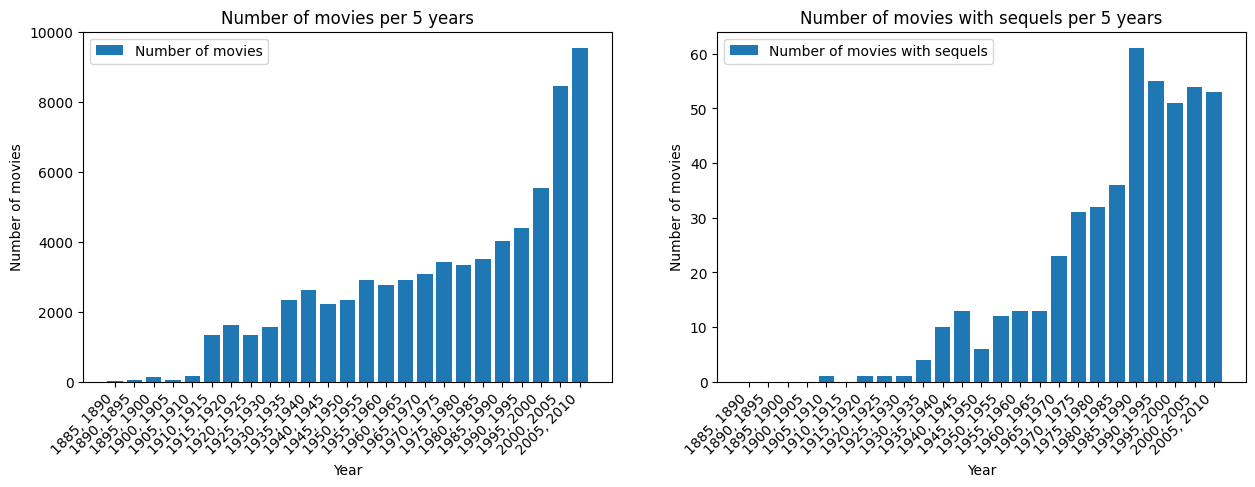

In [ ]:
#extraction of the release year

movie_df["release year"] = movie_df["Movie release date"].apply(lambda x: str(x)[:4] if str.isdigit(str(x)[:4]) else np.nan)
movie_df["release year"] = movie_df["release year"].astype(float)

#keep only the movies released between 1880 and 2010 (inclusive of 1880 but excluding 2010)

    #first with movies

movie_df = movie_df[movie_df["release year"] >= 1880]
movie_df = movie_df[movie_df["release year"] < 2010]

    #then with movies with sequels

movie_df_sequel_only["release year"] = movie_df_sequel_only["release_date"].apply(lambda x: str(x)[:4] if str.isdigit(str(x)[:4]) else np.nan)
movie_df_sequel_only["release year"] = movie_df_sequel_only["release year"].astype(float)

movie_df_sequel_only = movie_df_sequel_only[movie_df_sequel_only["release year"] >= 1880]
movie_df_sequel_only = movie_df_sequel_only[movie_df_sequel_only["release year"] < 2010]

#grouping and count movies by release year

movies_per_years = movie_df.groupby(pd.cut(movie_df["release year"], np.arange(1885, 2011, 5))).count()
movies_sequel_per_year = movie_df_sequel_only.groupby(pd.cut(movie_df_sequel_only["release year"], np.arange(1885, 2011, 5))).count()

years = movies_per_years.index.astype(str)
years = [x[1:][:-1] for x in years]

#Plot figure 1 (left):  number of movies per 5 years

fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(221)
ax1.bar(years, movies_per_years["Wikipedia movie ID"], label="Number of movies")
ax1.legend()
ax1.title.set_text("Number of movies per 5 years")
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of movies")
plt.xticks(rotation=45, ha='right')

#Plot figure 2 (right):  number of movies with sequels per 5 year

ax2 = fig.add_subplot(222)
ax2.bar(years, movies_sequel_per_year["Wikipedia movie ID"], label="Number of movies with sequels")
ax2.legend()
ax2.title.set_text("Number of movies with sequels per 5 years")
ax2.set_xlabel("Year")
ax2.set_ylabel("Number of movies")
plt.xticks(rotation=45, ha='right')

plt.show()

Calculation and plot of the ratio between movies with sequel and the number of movies, both per 5 years.

$$
\text{Ratio} = \frac{\text{nb of movie with sequel per 5 year}}{\text{nb of movie per 5 year}}
$$

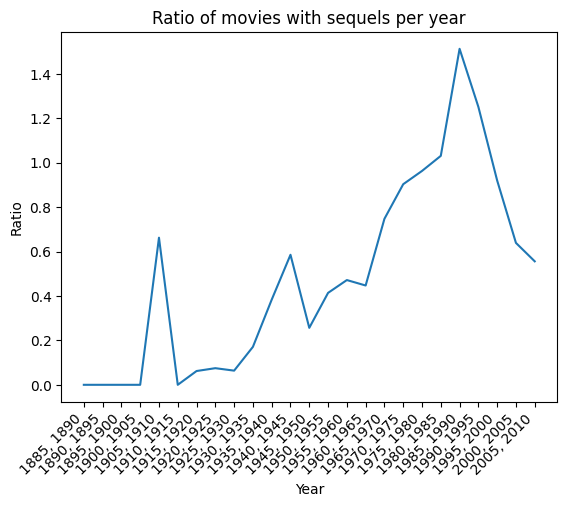

In [ ]:
    #remove the years with less than 50 movies
movies_per_years_removed = movies_per_years[movies_per_years["Wikipedia movie ID"] > 50]

movie_df_ratio = movies_sequel_per_year / movies_per_years_removed * 100
movie_df_ratio = movie_df_ratio.fillna(0)

plt.plot(years, movie_df_ratio["Wikipedia movie ID"])
plt.title("Ratio of movies with sequels per 5 year")
plt.xlabel("Year")
plt.ylabel("Ratio")
plt.xticks(rotation=45, ha='right')
plt.show()

## 3.2 Box office revenue

#### 3.2.1 Box office revenue for movies with sequels compared to all movies

Creation of a function, using the Consumer Price Index (CPI), that calaculate the inflation adjustement for each movies based on their released year

In [ ]:

def inflate(revenue, year):
    if np.isnan(revenue) or np.isnan(year) or year < 1900:  #no inflation adjustement for missing values or years before 1900
        return np.nan
    if len(str(year)) != 4:
        year = int(str(year)[:4])
    return cpi.inflate(revenue, year)                       #apply Consumer Price Index (cpi) inflation adjustement

# applying the function to all movies and create a new column with the adjusted revenue

movie_df["Movie box office revenue inflation adj"] = movie_df.apply(lambda x: inflate(x["Movie box office revenue"], x["release year"]), axis=1)

Box office revenues inflation adjustement for other movies with sequels dataframe

In [92]:
movie_df_sequel_only["Movie box office revenue inflation adj"] = movie_df_sequel_only.apply(lambda x: inflate(x["Movie box office revenue"], x["release year"]), axis=1)
movie_df_sequel_original["Movie box office revenue inflation adj"] = movie_df_sequel_original.apply(lambda x: inflate(x["Movie box office revenue"], x["release year"]), axis=1)

Calculation and plot of total box office revenue per year

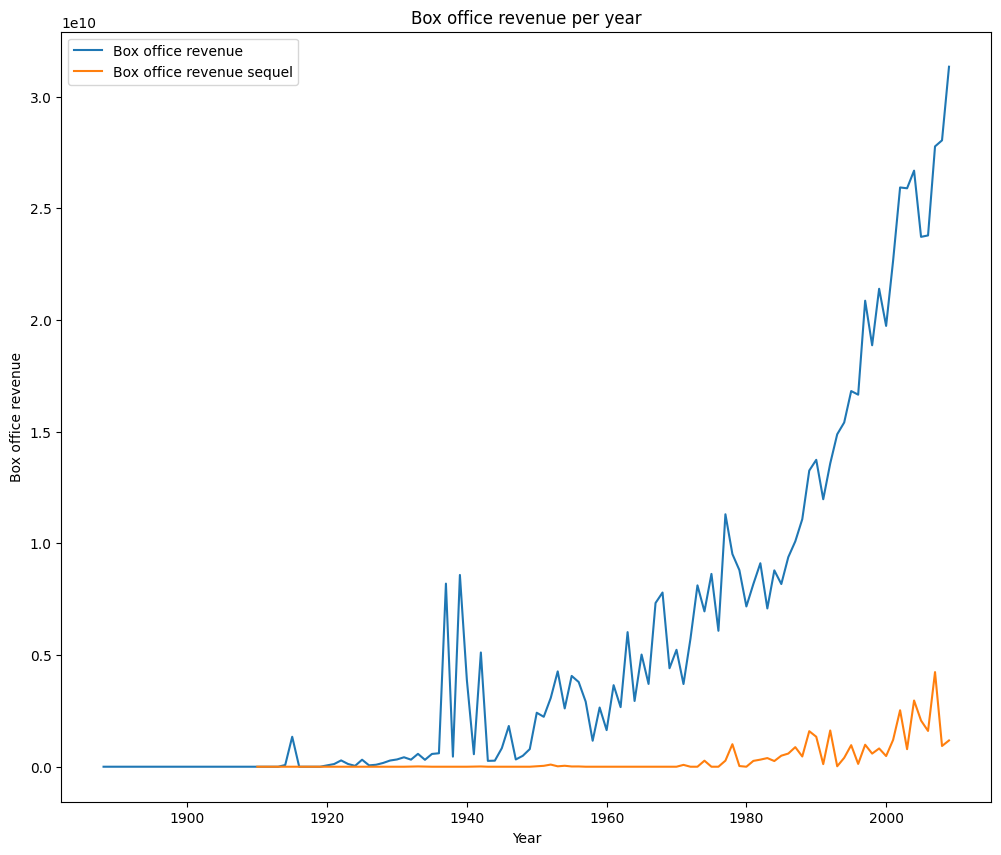

In [ ]:
#sum of the box office revenue per year, first for all movies, then for movies with sequels

box_office_per_year = movie_df.groupby("release year")["Movie box office revenue inflation adj"].agg('sum')
box_office_sequel_per_year = movie_df_sequel_only.groupby("release year")["Movie box office revenue inflation adj"].agg('sum')

#replace NaN values by 0

box_office_per_year = box_office_per_year.fillna(0)
box_office_sequel_per_year = box_office_sequel_per_year.fillna(0)

"""
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot()
ax1.plot(box_office_per_year.index, box_office_per_year, label="Box office revenue")
ax1.legend()
ax1.title.set_text("Box office revenue per year")
ax1.set_xlabel("Year")
ax1.set_ylabel("Box office revenue")

ax2 = fig.add_subplot()
ax2.plot(box_office_sequel_per_year.index, box_office_sequel_per_year, label="Box office revenue sequel")
ax2.legend()
ax2.title.set_text("Box office revenue sequel per year")
ax2.set_xlabel("Year")
ax2.set_ylabel("Box office revenue")
"""

# Plot figure 4: box office revenue per year

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(box_office_per_year.index, box_office_per_year, label="Box office revenue")
ax.plot(box_office_sequel_per_year.index, box_office_sequel_per_year, label="Box office revenue sequel")

plt.draw()                                                  # Draw the plot to get the current y-axis offset
y_axis_offset = ax.get_yaxis().get_offset_text().get_text() # get the scientific notation multiplier from the axis and use it in the label
ax.set_ylabel(f"Box office revenue [{y_axis_offset}$]")
ax.get_yaxis().get_offset_text().set_visible(False)         # remove the scientific notation from the axis to avoid duplication
ax.legend()
ax.set_title("Box office revenue per year")
ax.set_xlabel("Year")

plt.show()

Calculation and plots the percentage of box office revenue each year contributed by movies with sequels, relative to the total box office revenue for all movies that year

$$
\text{Box Office \%} = \frac{\text{Box office of movies with sequel per year}}{\text{Box office for all movies per year}} * 100
$$

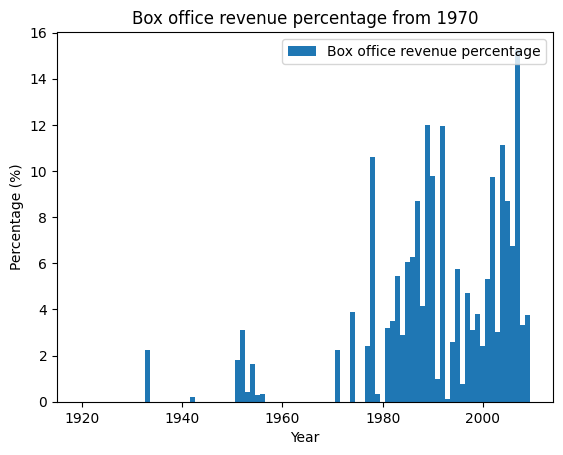

In [ ]:
# calculate the percentage of box office revenue from movies with sequels

box_office_percentage = box_office_sequel_per_year / box_office_per_year * 100

# Plot figure 5: box office revenue percentage per year

box_office_percentage_plot, ax = plt.subplots()
ax.bar(box_office_percentage.index, box_office_percentage, label="Box office revenue percentage", width=1)
ax.legend(loc='upper left')
ax.title.set_text("Box office revenue percentage from 1970")
ax.set_xlabel("Year")
ax.set_ylabel("Percentage (%)")

plt.show()

Calculation and plot of the average inflation-adjusted box office revenue per year, both for all movies and for movies with sequels

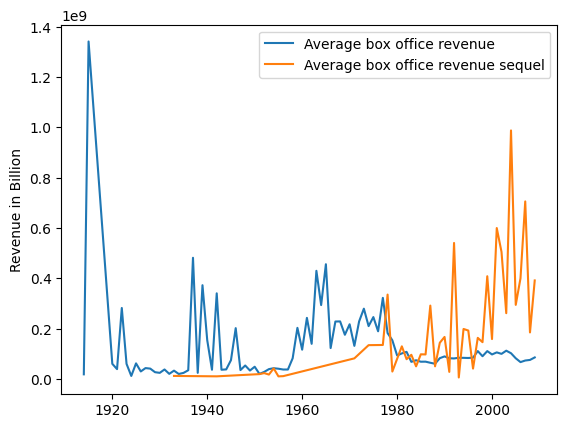

In [ ]:
#calculate box office revenue per movie and fill NaN values with 0

average_box_office = movie_df.dropna(subset = ['Movie box office revenue inflation adj']).groupby("release year")["Movie box office revenue inflation adj"].agg('mean')
average_box_office = average_box_office.fillna(0)

#calculate box office revenue per movie for movies with sequels and fill NaN values with 0

average_box_office_sequel = movie_df_sequel_only.dropna(subset = ['Movie box office revenue inflation adj']).groupby("release year")["Movie box office revenue inflation adj"].agg('mean')
average_box_office_sequel = average_box_office_sequel.fillna(0)

# Plot figure 6: average box office revenue per year

average_box_office_plot, ax = plt.subplots()
ax.plot(average_box_office.index, average_box_office, label="Average box office revenue")
ax.plot(average_box_office_sequel.index, average_box_office_sequel, label="Average box office revenue sequel")

plt.draw()                                                  # Draw the plot to get the current y-axis offset
y_axis_offset = ax.get_yaxis().get_offset_text().get_text() # get the scientific notation multiplier from the axis and use it in the label
ax.set_ylabel(f"Revenue [{y_axis_offset}$]")
ax.get_yaxis().get_offset_text().set_visible(False)         # remove the scientific notation from the axis to avoid duplication
ax.legend()
ax.set_title("Average Box Office Revenue per Year")
plt.show()

#### 3.2.2 Box office revenue for movies with sequel compared to the first movie of the collection

In [ ]:
#identify and calculate the box office revenue of the first movie in each collection

box_office_first_movie = movie_df_sequel_original.sort_values("release_date").groupby("collection").first()["Movie box office revenue inflation adj"]

#calculate the remaining box office revenue for each collection

box_office_remainder = movie_df_sequel_original.groupby("collection")["Movie box office revenue inflation adj"].agg('sum') - box_office_first_movie

#calculate the remaining box office revenue for each collection (excluding the first movie)

box_office_remainder_avg = box_office_remainder / (movie_df_sequel_original.groupby("collection").count()["Movie name"] - 1)

Creation of new DataFrame in order to store first movie and remain movies box office value

In [ ]:
first_vs_rest = pd.DataFrame()
first_vs_rest["first"] = box_office_first_movie
first_vs_rest["rest"] = box_office_remainder
first_vs_rest["rest_avg"] = box_office_remainder_avg

first_vs_rest = first_vs_rest[first_vs_rest["rest"] > 0]                #remove collections with no revenue
first_vs_rest = first_vs_rest.sort_values("first", ascending=True)      #sort in ascending order for the first movie (lowest to the highest)

In [98]:
first_vs_rest['index'] = range(0, len(first_vs_rest))

Plot the comparison between first and remaining movie of collections

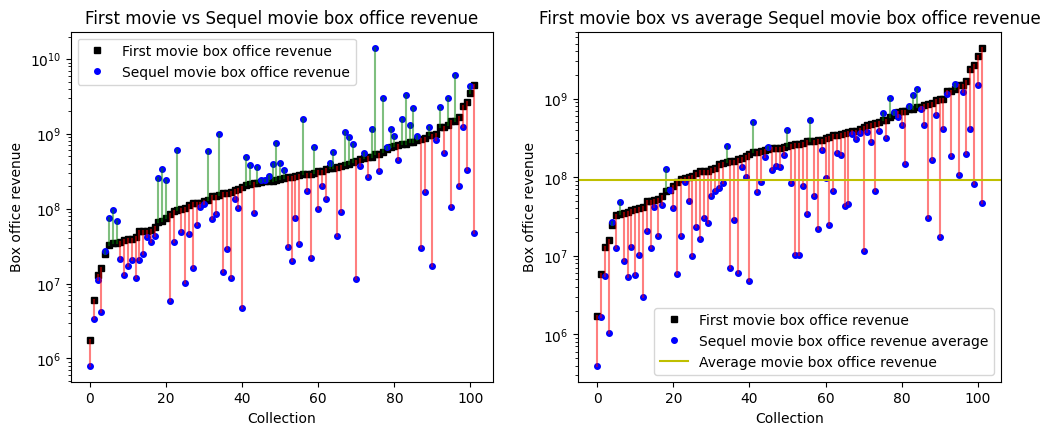

In [ ]:
fig = plt.figure(figsize=(12, 10))

#calculate the average adjusted box office revenue for all movies

average_movie_revenue = movie_df.dropna(subset = ['Movie box office revenue inflation adj'])["Movie box office revenue inflation adj"].agg('mean')

#Plot figure 7: first movie vs sequel movie box office revenue

ax1 = fig.add_subplot(221)
x = first_vs_rest["index"]
y1 = first_vs_rest["first"]
y2 = first_vs_rest["rest"]
ax1.plot(x, y1, 'ks', markersize = 4, label="First movie box office revenue")
ax1.plot(x, y2, 'bo', markersize = 4, label="Sequel movie box office revenue")

ax1.plot((x[y1>y2],x[y1>y2]),(y1[y1>y2], y2[y1 > y2]),c= "red", alpha=0.5)      #the first movie has a lower revenue than the sequel
ax1.plot((x[y1<y2],x[y1<y2]),(y1[y1<y2], y2[y1 < y2]),c= "green", alpha=0.5)    #the first movie has a higher revenue than the sequel

ax1.legend()
ax1.title.set_text("First movie vs Sequel movie box office revenue")
ax1.set_xlabel("Collection")
ax1.set_ylabel("Box office revenue")
ax1.set_yscale("log")

#Plot figure 8: first movie vs average sequel movie box office revenue

ax2 = fig.add_subplot(222)
x = first_vs_rest["index"]
y1 = first_vs_rest["first"]
y2 = first_vs_rest["rest_avg"]
ax2.plot(x, y1, 'ks', markersize = 4, label="First movie box office revenue")
ax2.plot(x, y2, 'bo', markersize = 4, label="Sequel movie box office revenue average")

ax2.plot((x[y1>y2],x[y1>y2]),(y1[y1>y2], y2[y1 > y2]),c= "red", alpha=0.5)                                  #the first movie has a lower revenue than the average sequel
ax2.plot((x[y1<y2],x[y1<y2]),(y1[y1<y2], y2[y1 < y2]),c= "green", alpha=0.5)                                #the first movie has a higher revenue than the average sequel
ax2.axhline(y=average_movie_revenue, color='y', linestyle='-', label="Average movie box office revenue")    #average revenue for all movies

ax2.legend()
ax2.title.set_text("First movie box vs average Sequel movie box office revenue")
ax2.set_xlabel("Collection")
ax2.set_ylabel("Box office revenue")
ax2.set_yscale("log")

plt.show()


These plots highlight where the first movie outperforms the sequel (red lines) and vice versa (green lines). The second plot also includes a yellow horizontal line showing the average box office revenue of all movies in the dataset.

The log scale on the y-axis is used to better visualize large differences in revenue, especially when there are very high values.

## 4. Number of movies in a collection

In [100]:
movie_df_sequel_original

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Unnamed: 0.1,Unnamed: 0,id,release_date,original_title,title,collection,collection_id,release year,Movie box office revenue inflation adj
43,26878691,/m/0f400r,Mysterious Island,1982,NaN,100.0,"{""/m/0653m"": ""Standard Mandarin""}","{""/m/03h64"": ""Hong Kong""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/08322"":...",868,868,73752,1982-02-25,神鵰俠侶,Brave Archer and His Mate,The Brave Archer Collection,205675,1982.0,NaN
151,1305819,/m/04rjwf,C.H.U.D.,1984-08-31,4650000.0,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0g092b"": ""Monster movie"", ""/m/06vxwl5"": ""...",1545,1545,23730,1984-08-31,C.H.U.D.,C.H.U.D.,C.H.U.D. Collection,257571,1984.0,1.212715e+07
179,33872851,/m/09vnx57,The Lone Wolf Meets a Lady,1940-05-30,NaN,71.0,"{""/m/0349s"": ""Greek Language"", ""/m/02h40lc"": ""...","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/028v3"": ""Det...",124,124,85231,1940-05-30,The Lone Wolf Meets a Lady,The Lone Wolf Meets a Lady,Lone Wolf Collection,395433,1940.0,NaN
182,2509881,/m/07jwzw,Critters 3,1991,NaN,94.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06n90"": ""Science Fiction"", ""/m/03npn"": ""H...",677,677,12702,1991-12-11,Critters 3,Critters 3,Critters Collection,10893,1991.0,NaN
238,1940449,/m/067p6m,RoboCop 3,1993-11-05,10600000.0,105.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",1410,1410,5550,1993-01-21,RoboCop 3,RoboCop 3,RoboCop Collection,5547,1993.0,1.987738e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81329,7146019,/m/0h6npj,The Parent Trap II,1986-07-26,NaN,210.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01z4y"": ""Comedy""}",1329,1329,51881,1986-07-26,The Parent Trap II,The Parent Trap II,The Parent Trap Collection,216395,1986.0,NaN
81553,1138104,/m/049kmb,Beverly Hills Cop III,1994-05-25,119208989.0,104.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/0556j8"": ""Bu...",1816,1816,306,1994-05-24,Beverly Hills Cop III,Beverly Hills Cop III,Beverly Hills Cop Collection,85861,1994.0,2.179626e+08
81621,2472440,/m/07gf00,Turbulence,1997-01-10,11538235.0,101.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/01drsx"": ""Disast...",462,462,34314,1997-01-09,Turbulence,Turbulence,Turbulence Collection,166379,1997.0,1.947985e+07
81622,33537258,/m/0hgl8v0,Letters from Three Lovers,1973-10-03,NaN,75.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02l7c8"": ""Romance Film"", ""/m/07s9rl0"": ""D...",182,182,252903,1973-10-03,Letters from Three Lovers,Letters from Three Lovers,The Letters Collection,930026,1973.0,NaN


In [125]:
collection_size = movie_df_sequel_original.groupby("collection").count()["Movie name"]

box_office_revenue = movie_df_sequel_original.groupby("collection")["Movie box office revenue inflation adj"].agg('sum')

sequels_extended = pd.read_csv("data/sequels/sequels_extended_1880_2010.csv")
#movie_df_sequel_original = pd.merge(movie_df_sequel_original, sequels_extended[["id", "budget"]], on="id", how="inner")
budget_df = movie_df_sequel_original.groupby("collection")["budget"].agg('sum')

In [126]:
len(collection_size)

357

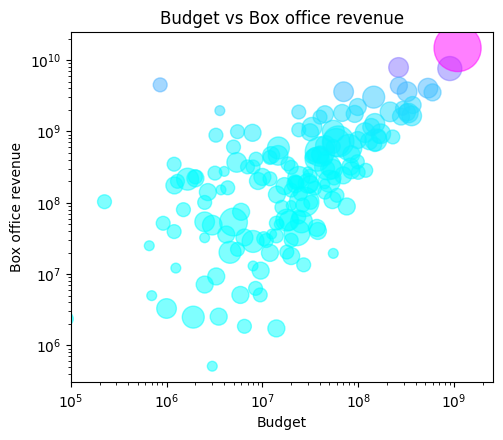

In [139]:
import seaborn as sns

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(221)

ax.scatter(budget_df, box_office_revenue, s = collection_size * 50, alpha=0.5, c = box_office_revenue, cmap="cool")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Budget")
ax.set_ylabel("Box office revenue")

ax.set_xlim(xmin = 1e5)
ax.set_ylim(ymax = 5e11)

ax.title.set_text("Budget vs Box office revenue")
plt.show()

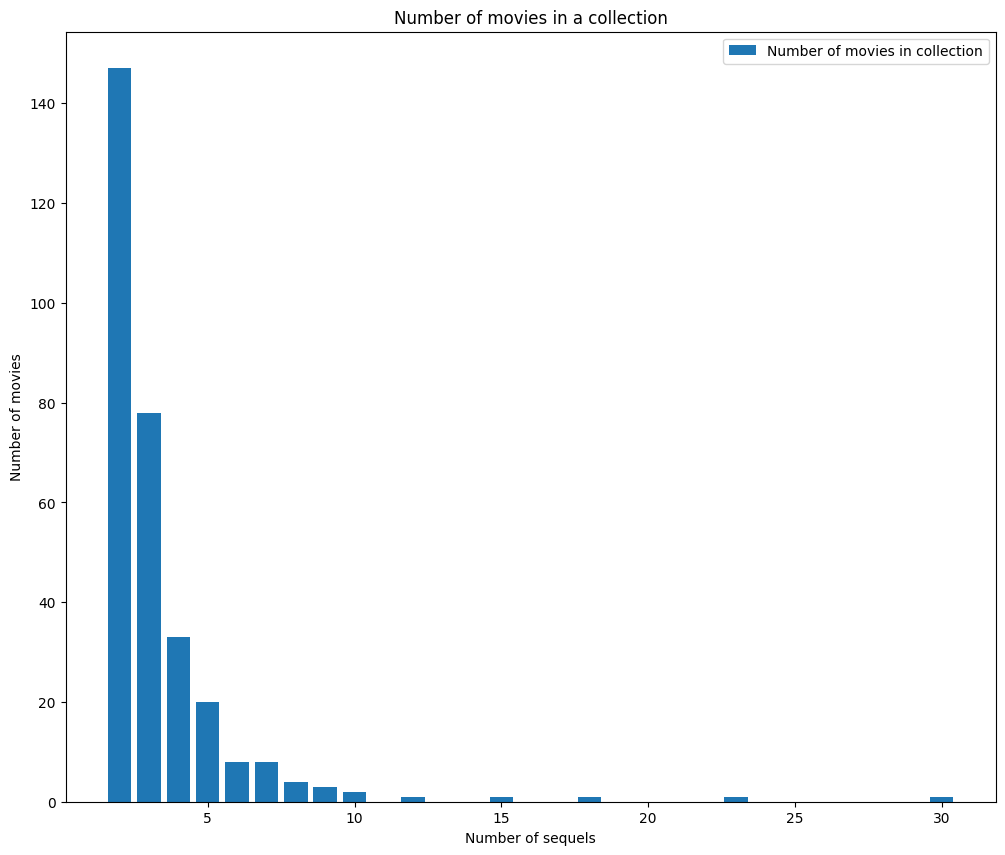

In [102]:
fig = plt.figure(figsize=(12, 10))

ax1 = fig.add_subplot()
ax1.bar(collection_size['Movie name'], collection_size["count"], label="Number of movies in collection")
ax1.legend()
ax1.title.set_text("Number of movies in a collection")
ax1.set_xlabel("Number of sequels")
ax1.set_ylabel("Number of movies")

plt.show()

Other line of enquiry:

Highest grossing series

By genre

Find studios that do a lot of sequels

Is there a correlation between the box office revenue of the first movie and the sequels

Add more box office revenue data and get movie budget data